In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


missing value check

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

duplicate value check

In [8]:
df.duplicated().sum()

0

checking unique values at each column


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

STATS OF DATASET


In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


CHECK NUMBER OF CATEGORICAL AND NUMERICALFEATURES

In [13]:
numeric=[i for i in df.columns if df[i].dtype!='O']
categorical=[i for i in df.columns if df[i].dtype=='O']
print("number of numeric features:",len(numeric),":",numeric)
print("number of categorical features:",len(categorical),":",categorical)

number of numeric features: 3 : ['math score', 'reading score', 'writing score']
number of categorical features: 5 : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


ADDING COLUMNS TOTAL AND AVERAGE

In [14]:
df['total']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total']/3

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


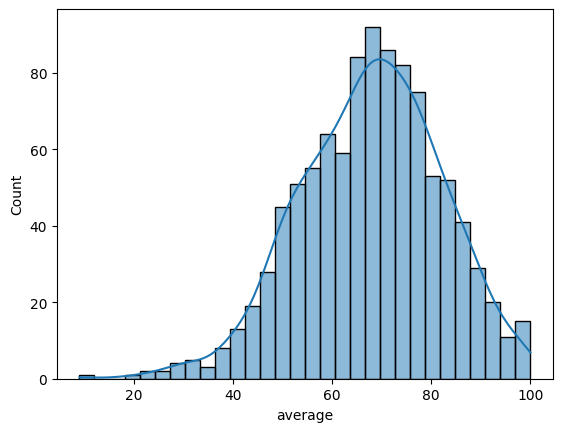

In [22]:
fig,axis=plt.subplots()
sns.histplot(data=df,x='average',bins=30,kde=True)
plt.show()

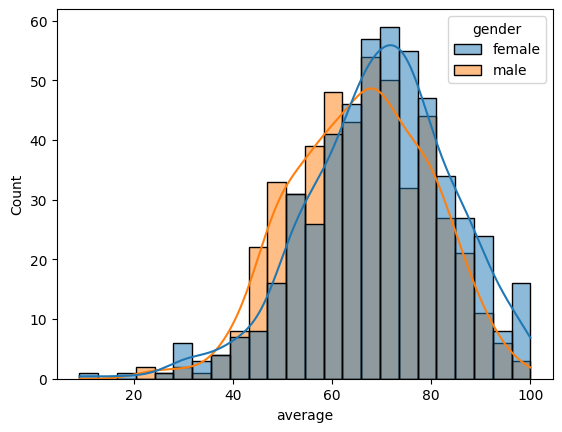

In [24]:
fig,axis=plt.subplots()
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.show()

INSIGHT: FEMALES PERFORM BETTER

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


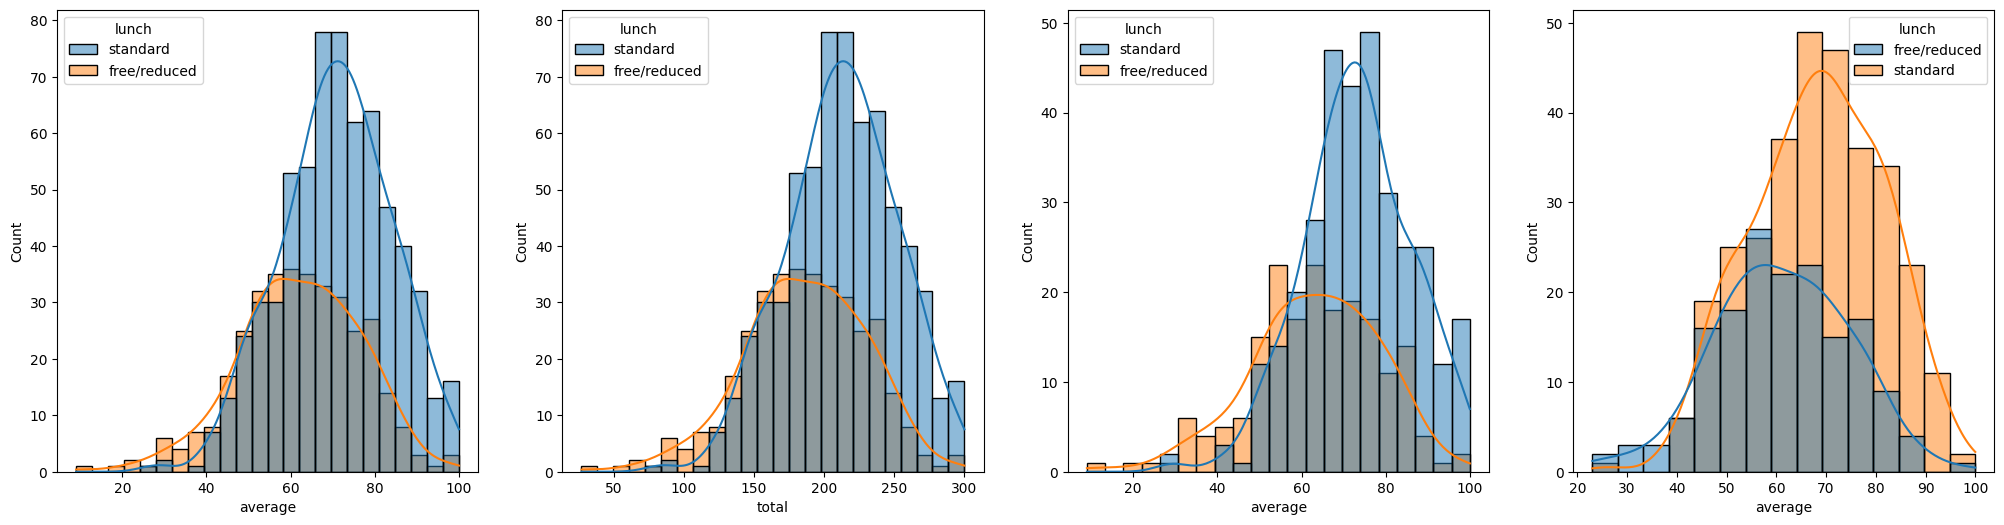

In [29]:
fig,axis=plt.subplots(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df,x='total',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)
plt.subplot(144)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.show()

INSIGHT: STUDENTS PERFORM WELL WHEN LUNCH IS STANDARD IRRESPECTIVE OF GENDER.

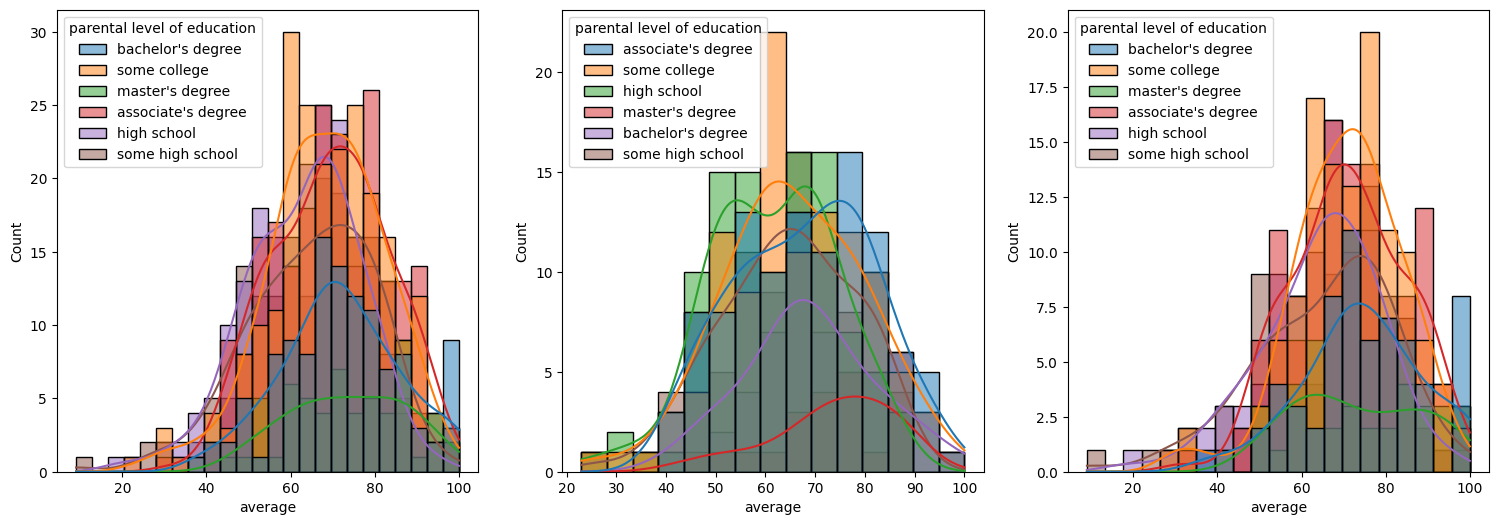

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

insight: parental education in general does not have much effect on student's test score

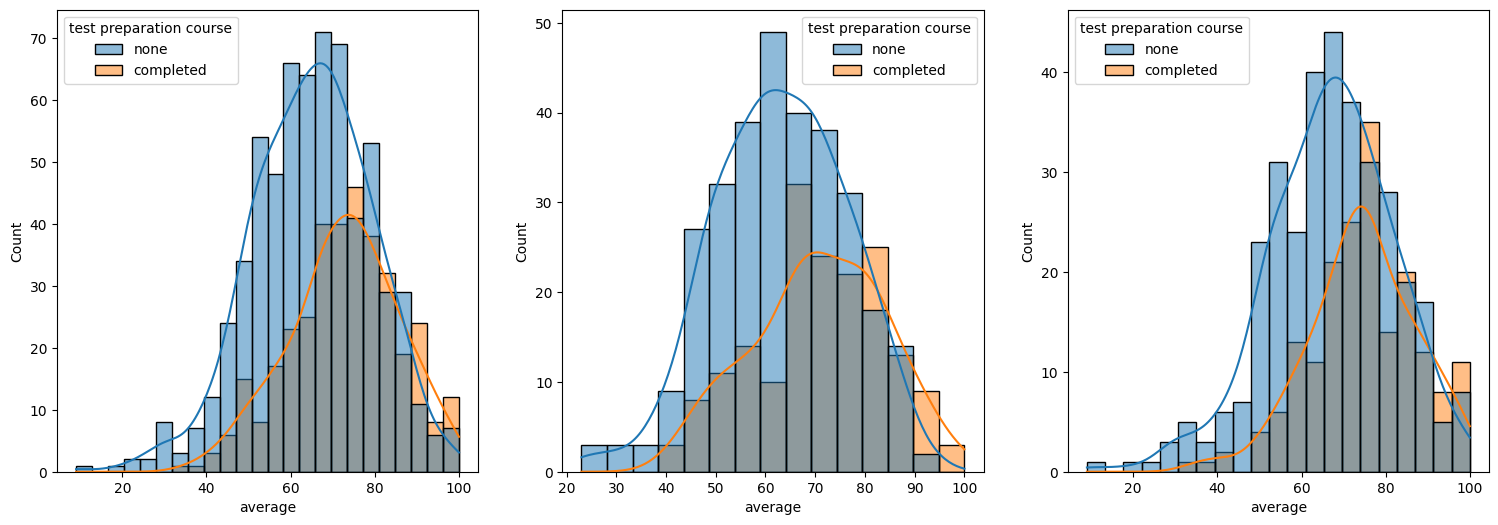

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='test preparation course')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test preparation course')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test preparation course')
plt.show()

insight: even if there is no test preparation course the students can perform well in general

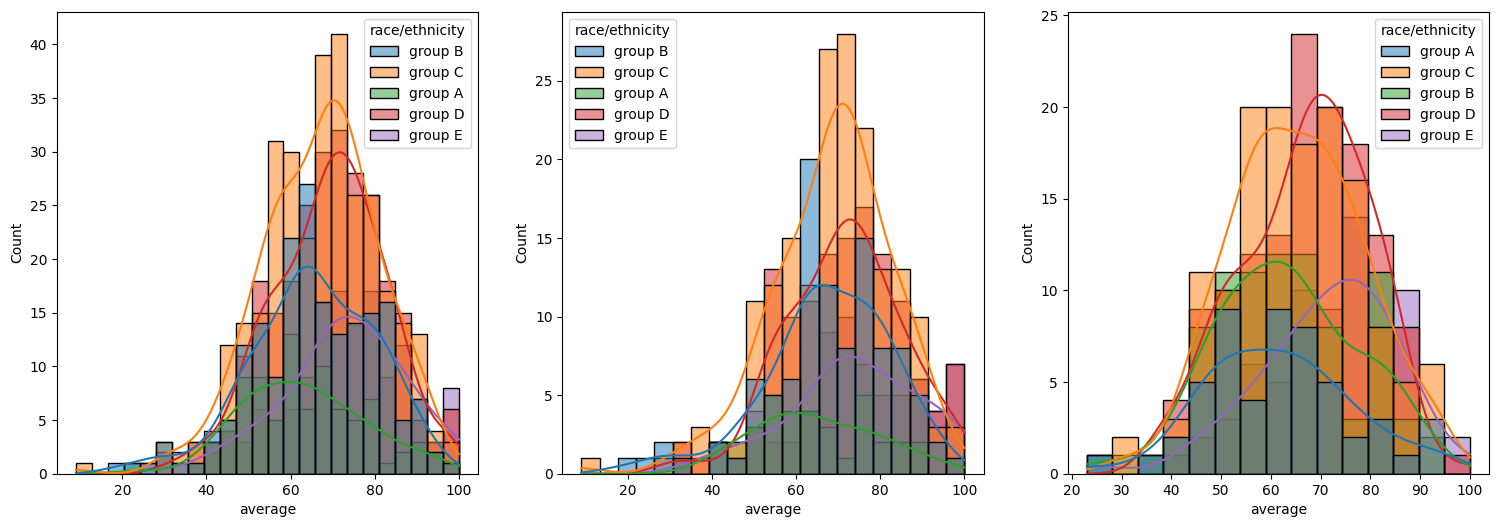

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

insights: group A and B students perform poorly irrespective of genders

SCORE RANGE

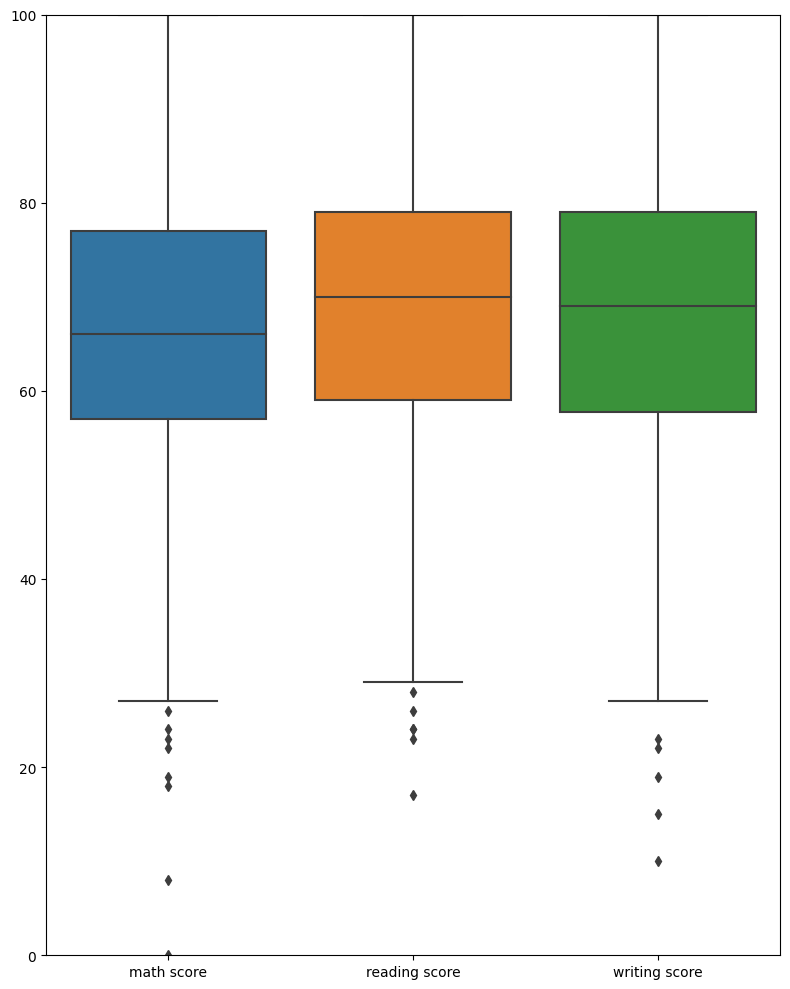

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(8, 10))

# Add boxplots to show the distribution and quartiles
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], ax=axes)

# Set the y-axis limits for the boxplots
axes.set_ylim(0, 100)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

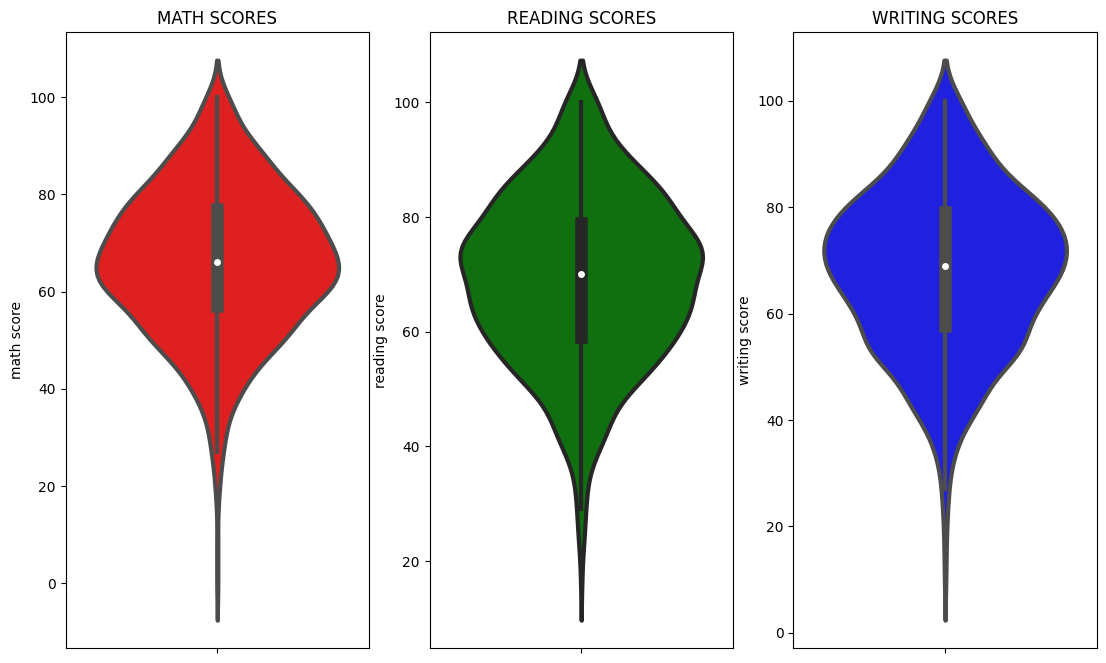

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

insights: students perform better in writing and reading than maths

distribution of each categorical feature on their unique categories

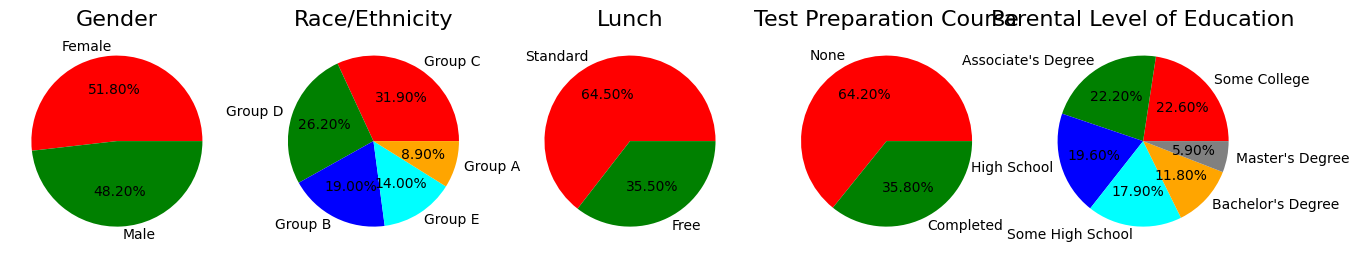

In [64]:
# Create subplots with increased spacing
fig, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=True, gridspec_kw={'hspace': 0.8})

# Plot 1: Gender
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']

axes[0].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[0].set_title('Gender', fontsize=16)
axes[0].axis('off')

# Plot 2: Race/Ethnicity
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

axes[1].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[1].set_title('Race/Ethnicity', fontsize=16)
axes[1].axis('off')

# Plot 3: Lunch
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']

axes[2].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[2].set_title('Lunch', fontsize=16)
axes[2].axis('off')

# Plot 4: Test Preparation Course
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']

axes[3].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[3].set_title('Test Preparation Course', fontsize=16)
axes[3].axis('off')

# Plot 5: Parental Level of Education
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

axes[4].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
axes[4].set_title('Parental Level of Education', fontsize=16)
axes[4].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8)

# Display the plots
plt.show()




1.   FEMALES AND MALES ARE ALMOST EQUAL
2.   group A is minority
3.   Standard lunch is preferred by more students
4.   Students who have not enrolled in any course is more
5.   Most parents have passed some college or associate's degree





In [70]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


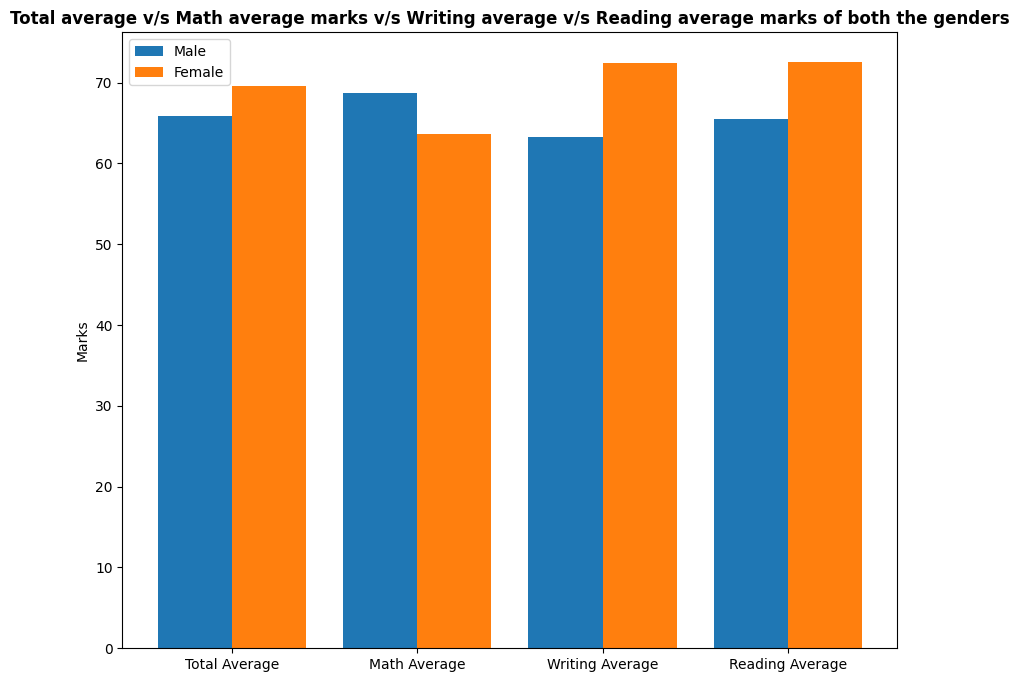

In [75]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Writing Average','Reading Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0],gender_group['writing score'][0], gender_group['reading score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1],gender_group['writing score'][1], gender_group['reading score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks v/s Writing average v/s Reading average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

FEMALES IN GENERAL HAVE A HIGHER SCORE


*   MALES HAVE A HIGHER MATHS SCORE
*   FEMALES HAVE A HIGHER READING AND WRITING SCORE



In [77]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [78]:
race_group = df.groupby('race/ethnicity').mean()
race_group

,math score,reading score,writing score,total,average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


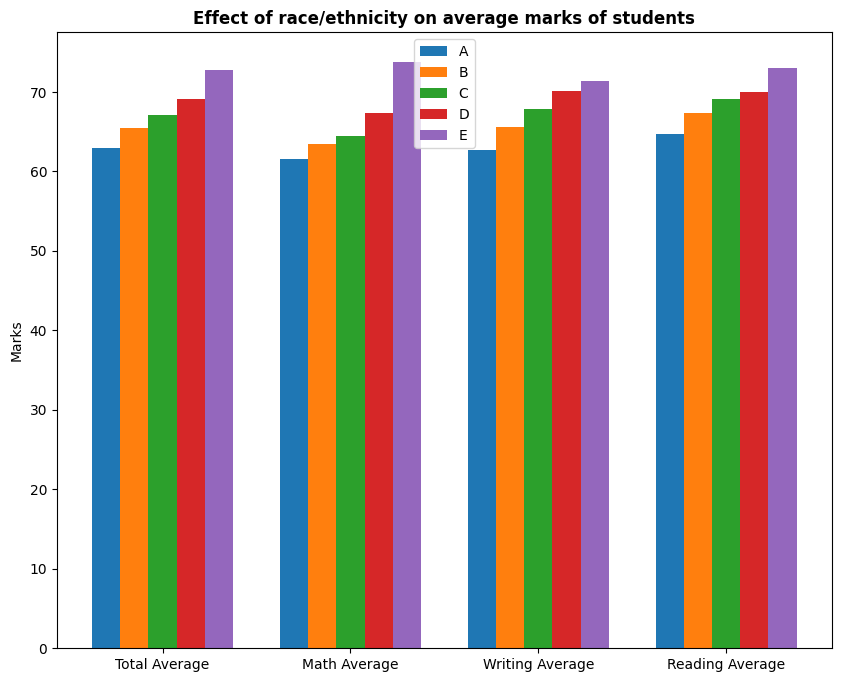

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average', 'Writing Average', 'Reading Average']

raceA_scores = [race_group['average'][0], race_group['math score'][0], race_group['writing score'][0], race_group['reading score'][0]]
raceB_scores = [race_group['average'][1], race_group['math score'][1], race_group['writing score'][1], race_group['reading score'][1]]
raceC_scores = [race_group['average'][2], race_group['math score'][2], race_group['writing score'][2], race_group['reading score'][2]]
raceD_scores = [race_group['average'][3], race_group['math score'][3], race_group['writing score'][3], race_group['reading score'][3]]
raceE_scores = [race_group['average'][4], race_group['math score'][4], race_group['writing score'][4], race_group['reading score'][4]]

X_axis = np.arange(len(X))
bar_width = 0.15

plt.bar(X_axis - 2*bar_width, raceA_scores, bar_width, label='A')
plt.bar(X_axis - bar_width, raceB_scores, bar_width, label='B')
plt.bar(X_axis, raceC_scores, bar_width, label='C')
plt.bar(X_axis + bar_width, raceD_scores, bar_width, label='D')
plt.bar(X_axis + 2*bar_width, raceE_scores, bar_width, label='E')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Effect of race/ethnicity on average marks of students", fontweight='bold')
plt.legend()

plt.show()




*   Group E scored highest
*   Group A scored lowest (has lowest social status due to ethnicity)



In [81]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [83]:
parent_group = df.groupby('parental level of education').mean()
parent_group

,math score,reading score,writing score,total,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


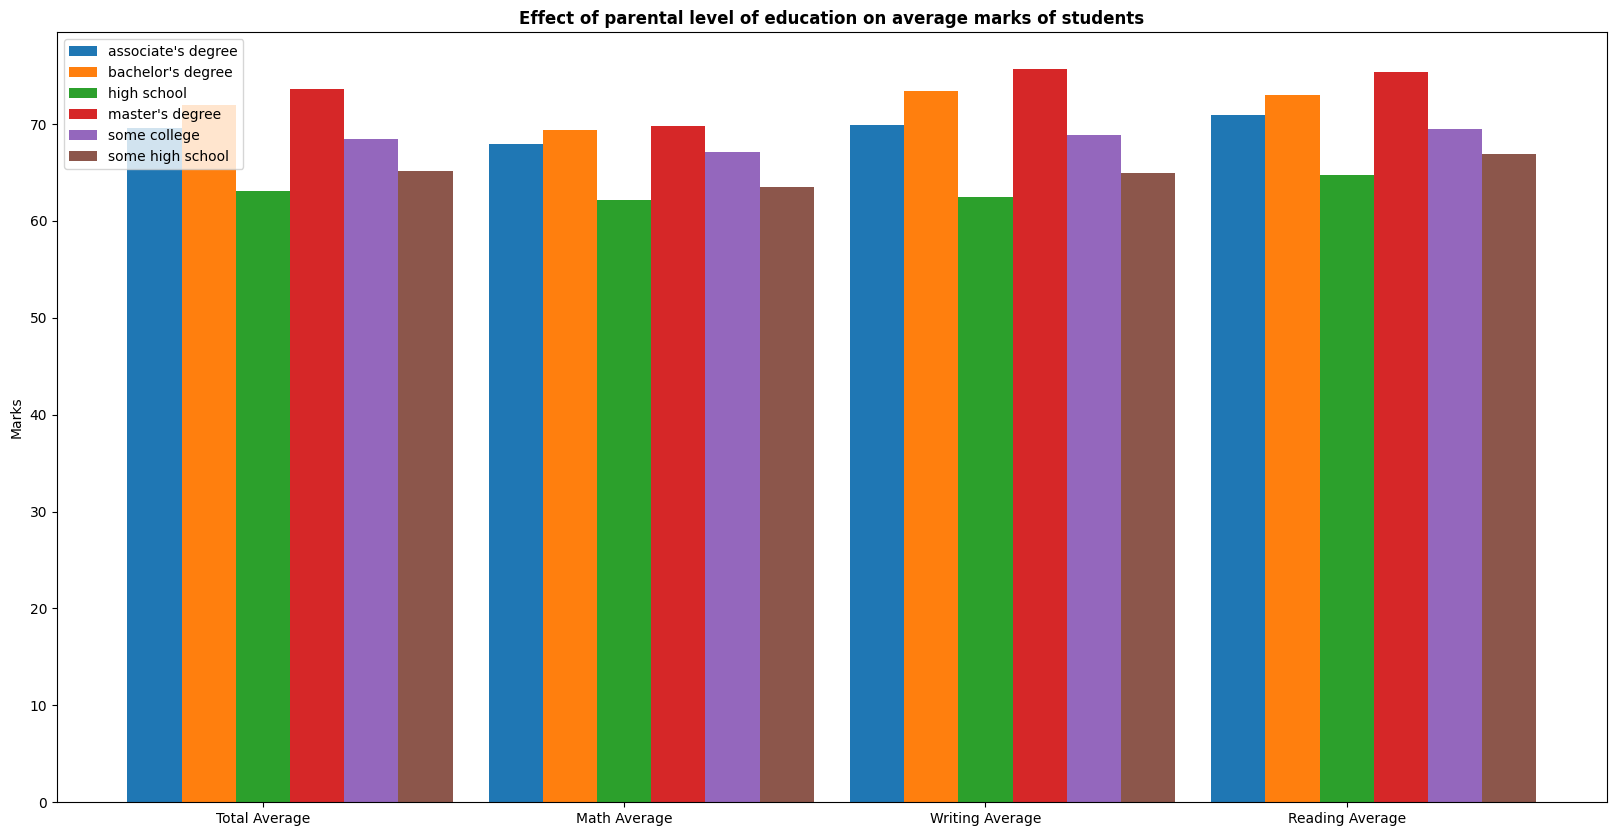

In [88]:
plt.figure(figsize=(20, 10))

X = ['Total Average', 'Math Average', 'Writing Average', 'Reading Average']

parentA_scores = [parent_group['average'][0], parent_group['math score'][0], parent_group['writing score'][0], parent_group['reading score'][0]]
parentB_scores = [parent_group['average'][1], parent_group['math score'][1], parent_group['writing score'][1], parent_group['reading score'][1]]
parentC_scores = [parent_group['average'][2], parent_group['math score'][2], parent_group['writing score'][2], parent_group['reading score'][2]]
parentD_scores = [parent_group['average'][3], parent_group['math score'][3], parent_group['writing score'][3], parent_group['reading score'][3]]
parentE_scores = [parent_group['average'][4], parent_group['math score'][4], parent_group['writing score'][4], parent_group['reading score'][4]]
parentF_scores = [parent_group['average'][5], parent_group['math score'][5], parent_group['writing score'][5], parent_group['reading score'][5]]

X_axis = np.arange(len(X))
bar_width = 0.15

plt.bar(X_axis - 2*bar_width, parentA_scores, bar_width, label='associate\'s degree')
plt.bar(X_axis - bar_width, parentB_scores, bar_width, label='bachelor\'s degree')
plt.bar(X_axis, parentC_scores, bar_width, label='high school')
plt.bar(X_axis + bar_width, parentD_scores, bar_width, label='master\'s degree')
plt.bar(X_axis + 2*bar_width, parentE_scores, bar_width, label='some college')
plt.bar(X_axis + 3*bar_width, parentF_scores, bar_width, label='some high school')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Effect of parental level of education on average marks of students", fontweight='bold')
plt.legend()

plt.show()




*   Students whose parents have master's or bachelor's score higher
*   Students whose parents have passed some high school tend to perform lower



In [90]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [95]:
lunch_group = df.groupby('lunch').mean()
lunch_group

,math score,reading score,writing score,total,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


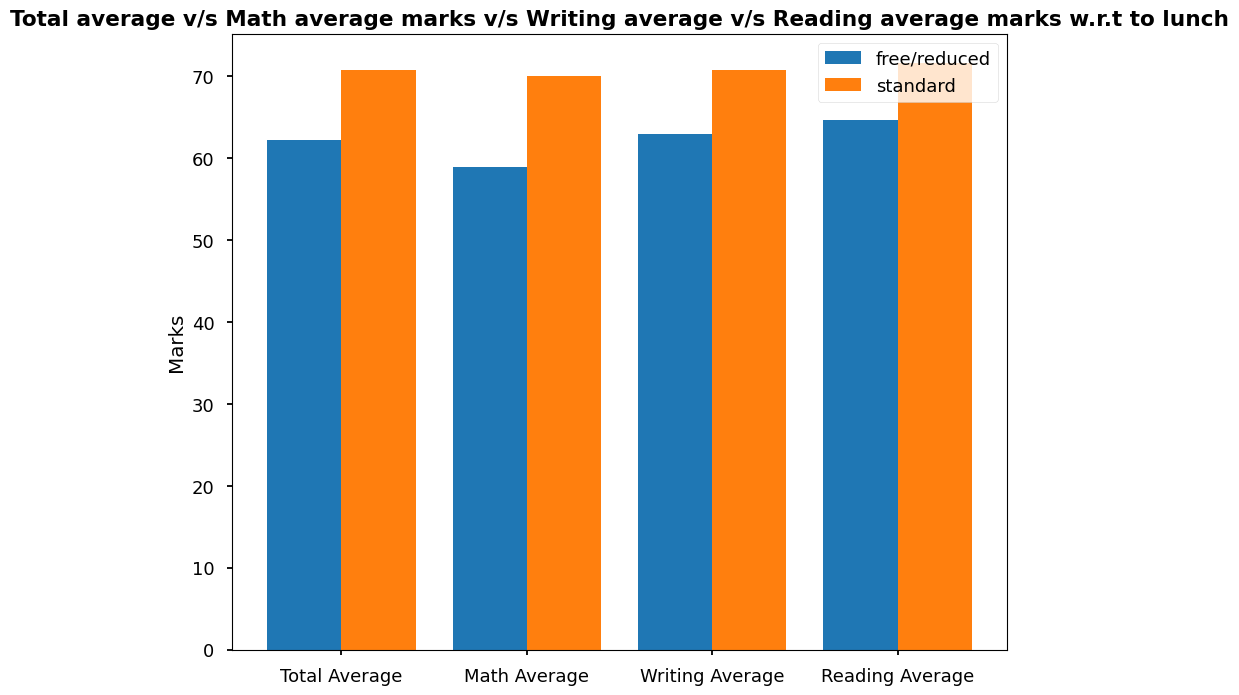

In [97]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Writing Average','Reading Average']


standard_scores = [lunch_group['average'][0], lunch_group['math score'][0],lunch_group['writing score'][0], lunch_group['reading score'][0]]
free_scores = [lunch_group['average'][1], lunch_group['math score'][1],lunch_group['writing score'][1], lunch_group['reading score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, standard_scores, 0.4, label = 'free/reduced')
plt.bar(X_axis + 0.2, free_scores, 0.4, label = 'standard')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks v/s Writing average v/s Reading average marks w.r.t to lunch", fontweight='bold')
plt.legend()
plt.show()

students with standard lunches perform better

In [98]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [100]:
test_preparation_group = df.groupby('test preparation course').mean()
test_preparation_group

,math score,reading score,writing score,total,average
test preparation course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


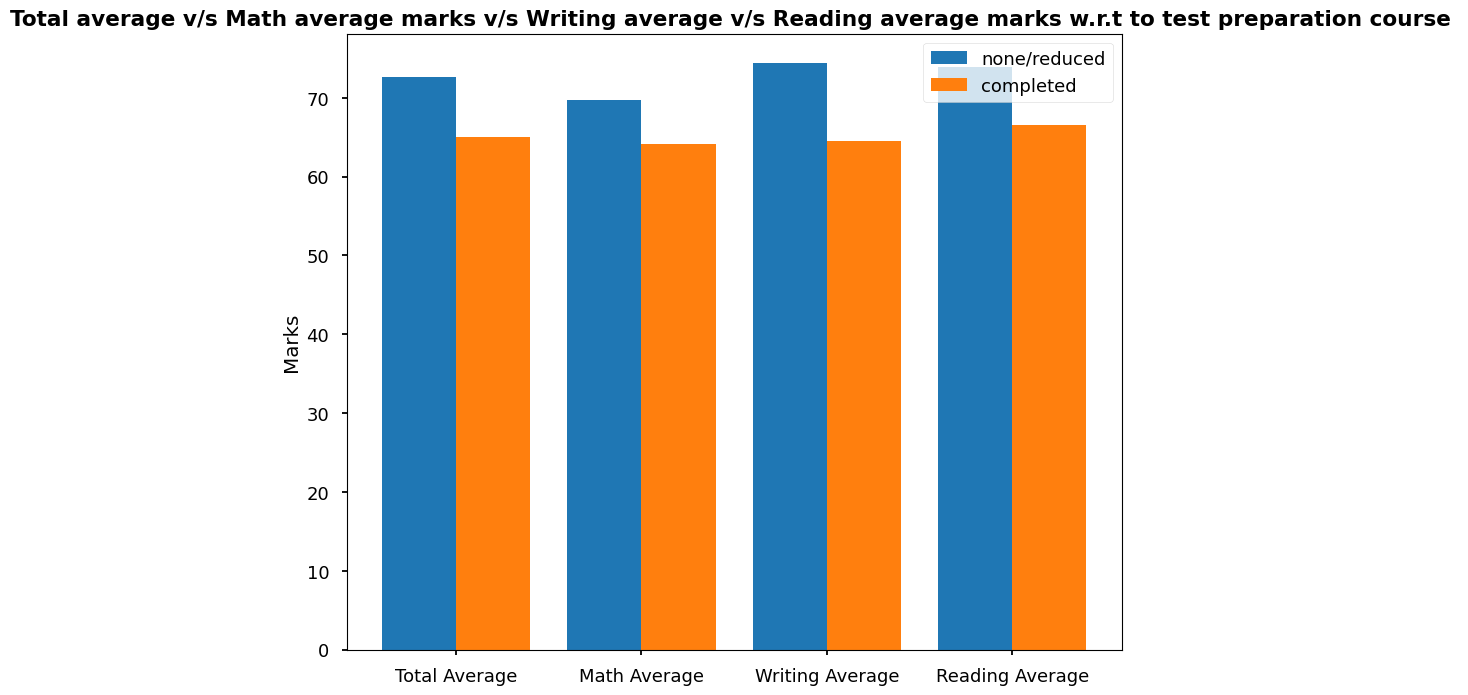

In [101]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Writing Average','Reading Average']


completed_scores = [test_preparation_group ['average'][0], test_preparation_group ['math score'][0],test_preparation_group ['writing score'][0], test_preparation_group ['reading score'][0]]
none_scores = [test_preparation_group ['average'][1], test_preparation_group ['math score'][1],test_preparation_group ['writing score'][1], test_preparation_group ['reading score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, completed_scores, 0.4, label = 'none/reduced')
plt.bar(X_axis + 0.2, none_scores, 0.4, label = 'completed')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks v/s Writing average v/s Reading average marks w.r.t to test preparation course ", fontweight='bold')
plt.legend()
plt.show()

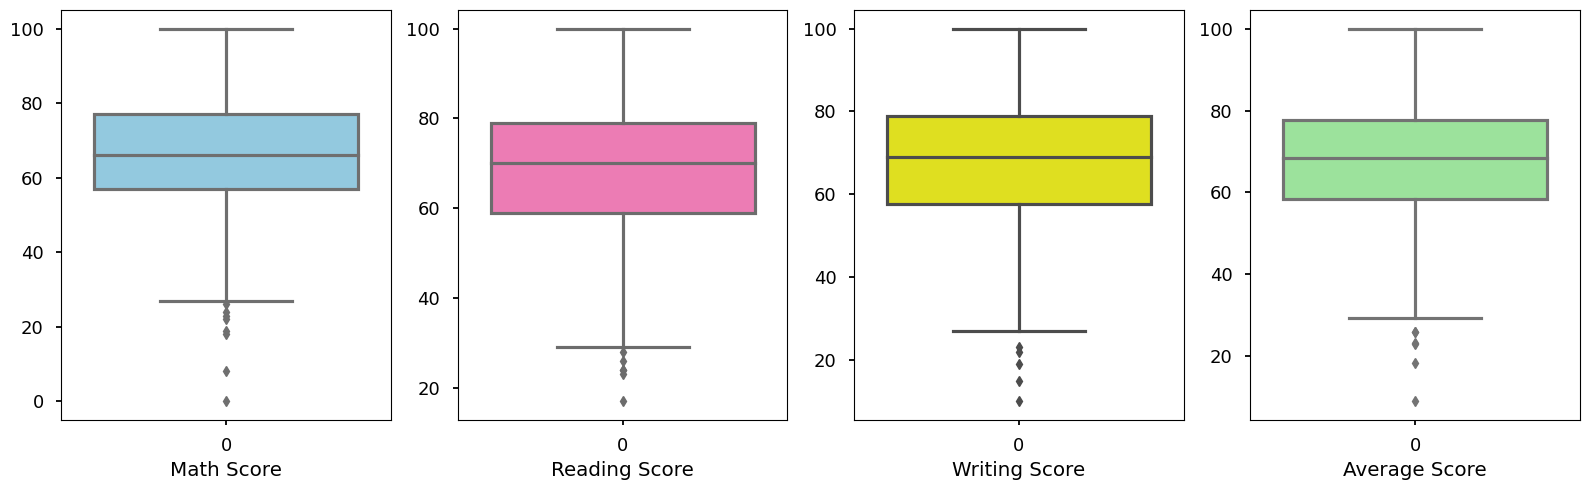

In [103]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.xlabel('Math Score')

plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.xlabel('Reading Score')

plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.xlabel('Writing Score')

plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.xlabel('Average Score')

plt.tight_layout()
plt.show()


some outliers exist